In [28]:
%matplotlib inline
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as tri

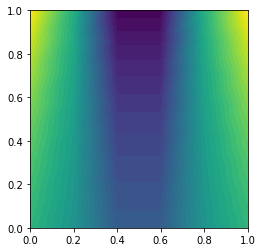

In [47]:
mesh = UnitSquareMesh(5, 7)
fs = FunctionSpace(mesh, 'CG', 2)

f = Expression("2*cos(2*x[0]*pi) * exp(x[1])", degree=10)
f = interpolate(f, fs)

plot(f)

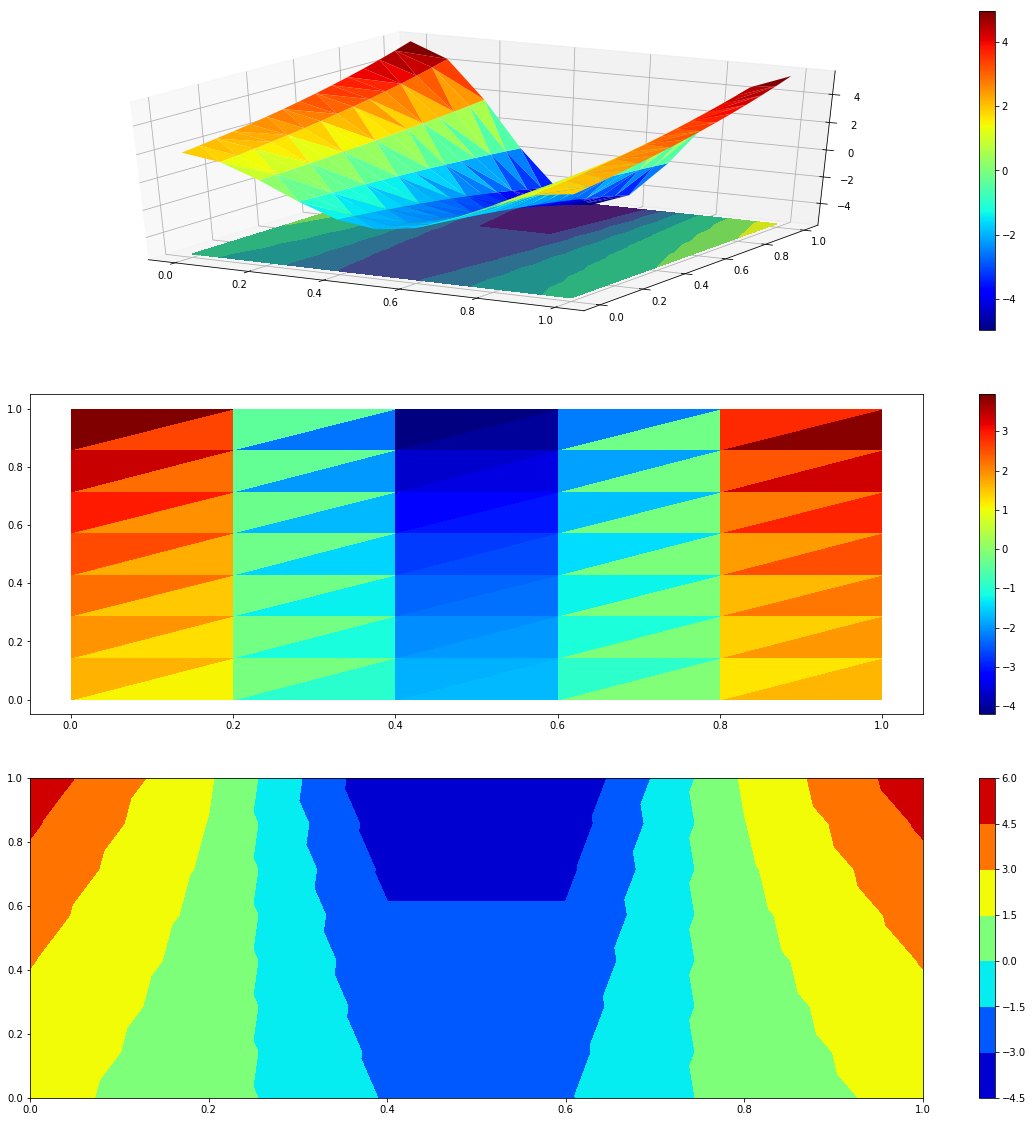

In [86]:
coordinates = fs.tabulate_dof_coordinates().reshape((-1,fs.mesh().geometry().dim()))
assert (fs.mesh().geometry().dim() == 2)
x = coordinates[:, 0]
y = coordinates[:, 1]

mesh_coordinates = fs.mesh().coordinates().reshape((fs.mesh().num_vertices(), fs.mesh().geometry().dim()))
triangles = np.asarray([cell.entities(0) for cell in cells(fs.mesh())])
triangulation = tri.Triangulation(mesh_coordinates[:, 0], mesh_coordinates[:, 1], triangles)
z_faces = [f(point) for point in mesh_coordinates]
z_min = np.min(z_faces)

z_values = f.vector()[:]

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(311, projection="3d")

a = ax.plot_trisurf(x, y, z_values, cmap=plt.cm.jet, antialiased=True)
ax.tricontourf(triangulation, z_faces, offset=z_min - 1, level=20)
fig.colorbar(a)

ax = fig.add_subplot(312)

a = ax.tripcolor(triangulation, z_faces, cmap=plt.cm.jet)
fig.colorbar(a)

ax = fig.add_subplot(313)

a = ax.tricontourf(triangulation, z_faces, cmap=plt.cm.jet, level=20)
fig.colorbar(a)